House Prices - Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques
Objective : Submit prediction and get RMSE>15400 using your model

In [1]:
#load all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
pd.options.mode.chained_assignment = None

<Axes: >

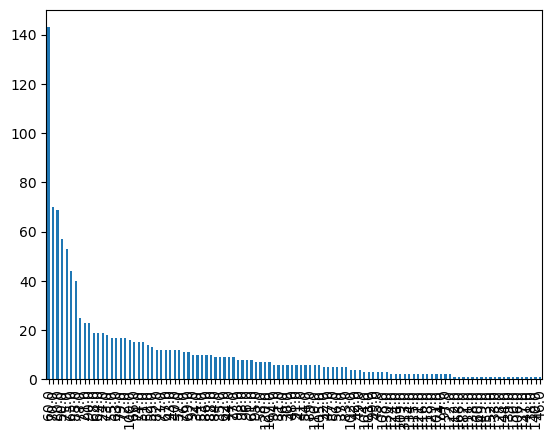

In [100]:
train.LotFrontage.value_counts().plot(kind='bar')

In [2]:
#load both datasets
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#drop id column because it's not used as predictor but save test.ID in another df for submission purpose 
test_ID = test.Id
train=train.drop(['Id'], axis=1)
test=test.drop(['Id'], axis=1)

C:\Users\oggy0\AppData\Local\Temp\ipykernel_20472\4282363766.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=train.corr()['SalePrice'].sort_values(ascending=False).plot(kind='bar')


[Text(0, 0, '1.000'),
 Text(0, 0, '0.791'),
 Text(0, 0, '0.709'),
 Text(0, 0, '0.640'),
 Text(0, 0, '0.623'),
 Text(0, 0, '0.614'),
 Text(0, 0, '0.606'),
 Text(0, 0, '0.561'),
 Text(0, 0, '0.534'),
 Text(0, 0, '0.523'),
 Text(0, 0, '0.507'),
 Text(0, 0, '0.486'),
 Text(0, 0, '0.477'),
 Text(0, 0, '0.467'),
 Text(0, 0, '0.386'),
 Text(0, 0, '0.352'),
 Text(0, 0, '0.324'),
 Text(0, 0, '0.319'),
 Text(0, 0, '0.316'),
 Text(0, 0, '0.284'),
 Text(0, 0, '0.264'),
 Text(0, 0, '0.227'),
 Text(0, 0, '0.214'),
 Text(0, 0, '0.168'),
 Text(0, 0, '0.111'),
 Text(0, 0, '0.092'),
 Text(0, 0, '0.046'),
 Text(0, 0, '0.045'),
 Text(0, 0, '-0.011'),
 Text(0, 0, '-0.017'),
 Text(0, 0, '-0.021'),
 Text(0, 0, '-0.026'),
 Text(0, 0, '-0.029'),
 Text(0, 0, '-0.078'),
 Text(0, 0, '-0.084'),
 Text(0, 0, '-0.129'),
 Text(0, 0, '-0.136')]

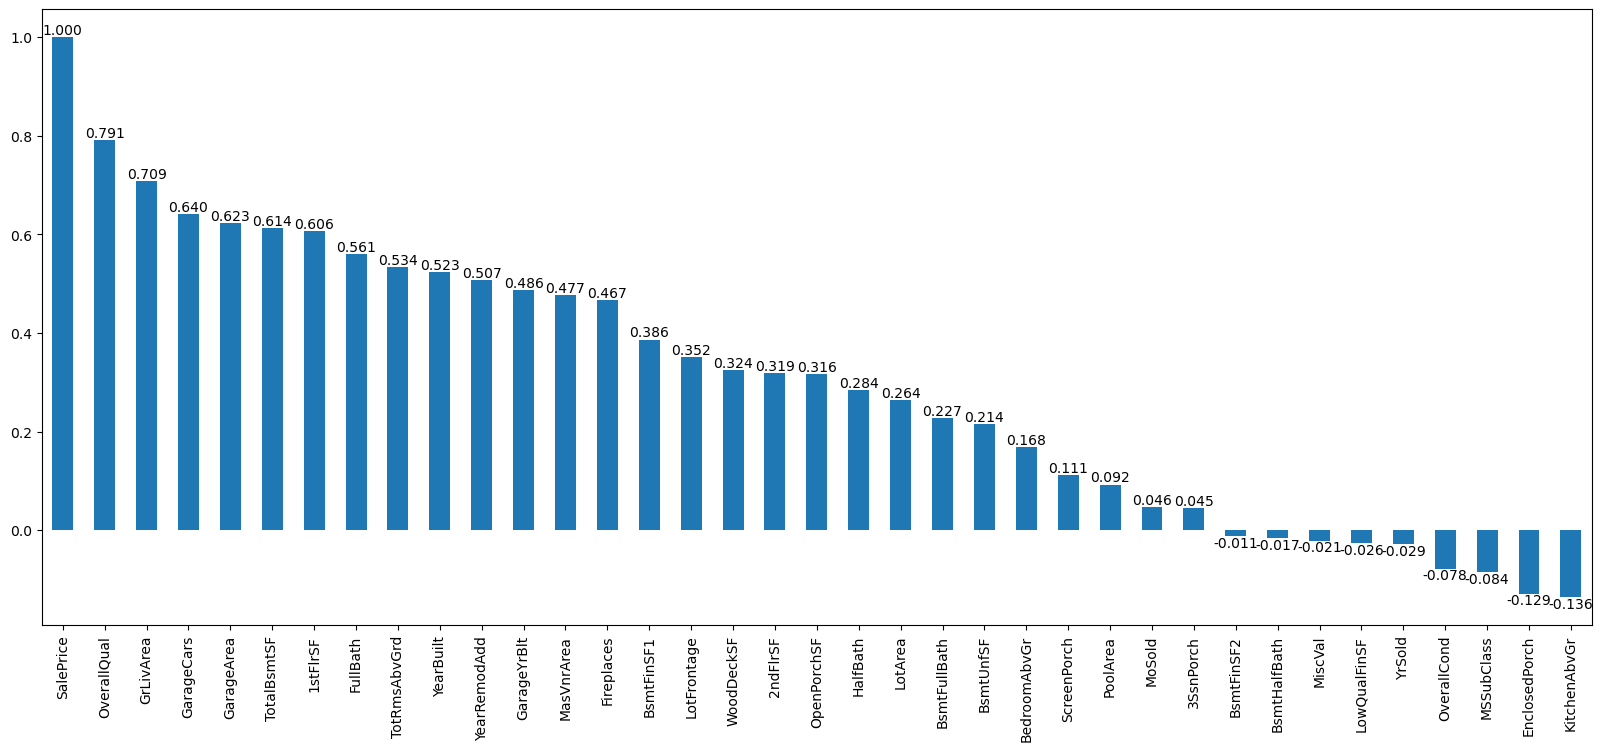

In [6]:
plt.figure(figsize=(20,8))
ax=train.corr()['SalePrice'].sort_values(ascending=False).plot(kind='bar')
ax.bar_label(ax.containers[0], fmt='{:,.3f}')

In [7]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
df = train[['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   OverallQual   1460 non-null   int64  
 2   GrLivArea     1460 non-null   int64  
 3   GarageCars    1460 non-null   int64  
 4   GarageArea    1460 non-null   int64  
 5   TotalBsmtSF   1460 non-null   int64  
 6   1stFlrSF      1460 non-null   int64  
 7   FullBath      1460 non-null   int64  
 8   TotRmsAbvGrd  1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  YearRemodAdd  1460 non-null   int64  
 11  GarageYrBlt   1379 non-null   float64
 12  MasVnrArea    1452 non-null   float64
 13  Fireplaces    1460 non-null   int64  
 14  BsmtFinSF1    1460 non-null   int64  
 15  LotFrontage   1201 non-null   float64
 16  WoodDeckSF    1460 non-null   int64  
 17  2ndFlrSF      1460 non-null   int64  
 18  OpenPorchSF   1460 non-null 

In [10]:
df.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF
0,208500,7,1710,2,548,856,856,2,8,2003,2003,2003.0,196.0,0,706,65.0,0,854,61
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,1976.0,0.0,1,978,80.0,298,0,0
2,223500,7,1786,2,608,920,920,2,6,2001,2002,2001.0,162.0,1,486,68.0,0,866,42
3,140000,7,1717,3,642,756,961,1,7,1915,1970,1998.0,0.0,1,216,60.0,0,756,35
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,2000.0,350.0,1,655,84.0,192,1053,84


In [11]:
#df.fillna(df.median())

C:\Users\oggy0\AppData\Local\Temp\ipykernel_20472\1726847838.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cmap='Paired')


<Axes: >

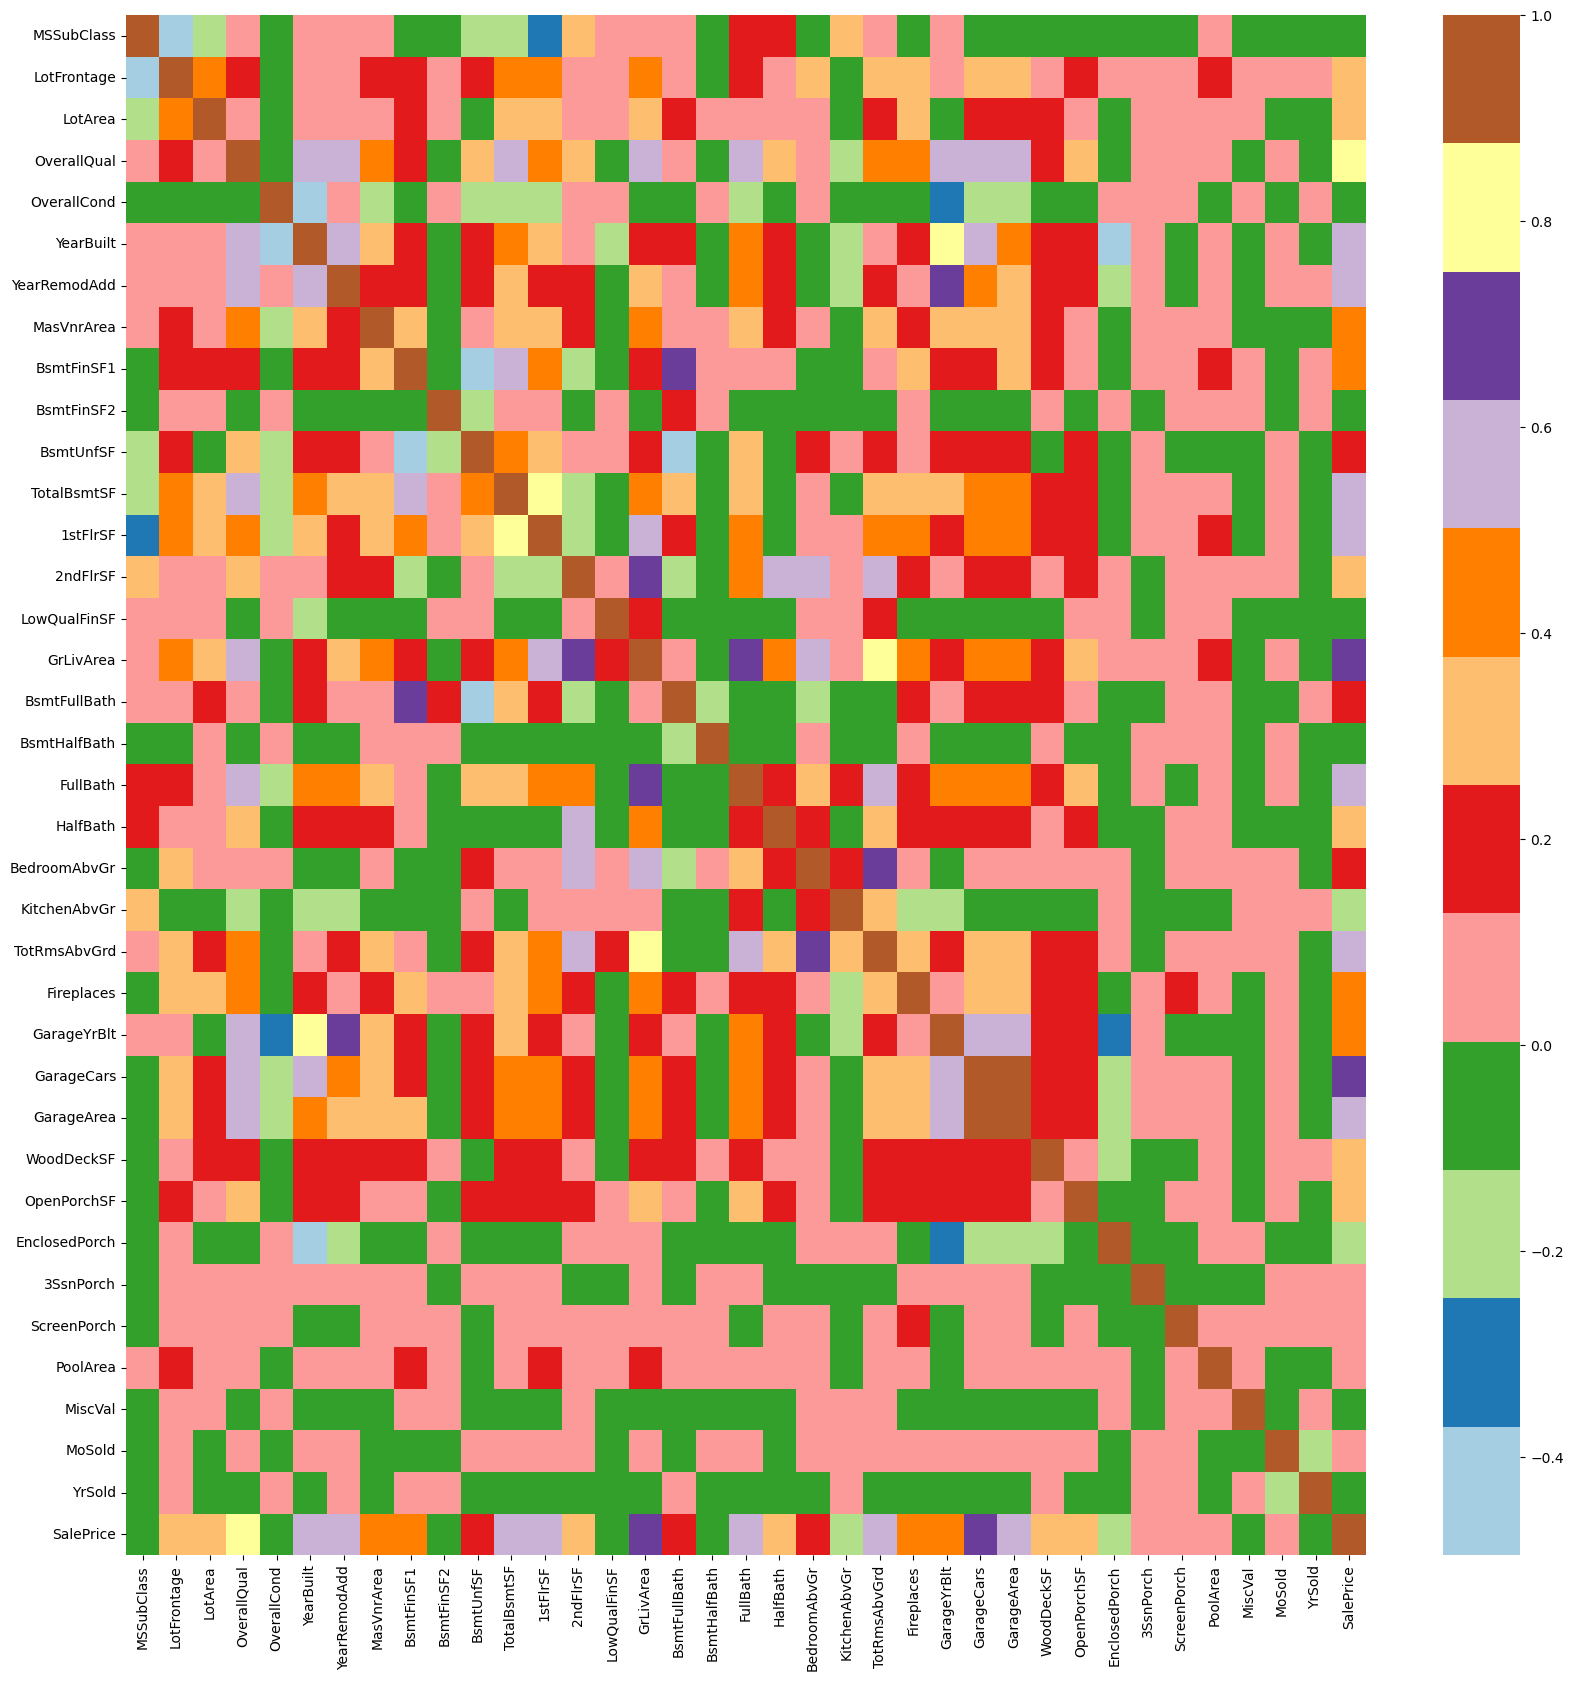

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), cmap='Paired')

Try to replace null values in LotFrontage by using regression

C:\Users\oggy0\AppData\Local\Temp\ipykernel_20472\3371706017.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=train.corr()['LotFrontage'].sort_values(ascending=False).plot(kind='bar')


[Text(0, 0, '1.000'),
 Text(0, 0, '0.457'),
 Text(0, 0, '0.426'),
 Text(0, 0, '0.403'),
 Text(0, 0, '0.392'),
 Text(0, 0, '0.352'),
 Text(0, 0, '0.352'),
 Text(0, 0, '0.345'),
 Text(0, 0, '0.286'),
 Text(0, 0, '0.267'),
 Text(0, 0, '0.263'),
 Text(0, 0, '0.252'),
 Text(0, 0, '0.234'),
 Text(0, 0, '0.206'),
 Text(0, 0, '0.199'),
 Text(0, 0, '0.193'),
 Text(0, 0, '0.152'),
 Text(0, 0, '0.133'),
 Text(0, 0, '0.123'),
 Text(0, 0, '0.101'),
 Text(0, 0, '0.089'),
 Text(0, 0, '0.089'),
 Text(0, 0, '0.080'),
 Text(0, 0, '0.070'),
 Text(0, 0, '0.070'),
 Text(0, 0, '0.054'),
 Text(0, 0, '0.050'),
 Text(0, 0, '0.041'),
 Text(0, 0, '0.038'),
 Text(0, 0, '0.011'),
 Text(0, 0, '0.011'),
 Text(0, 0, '0.007'),
 Text(0, 0, '0.003'),
 Text(0, 0, '-0.006'),
 Text(0, 0, '-0.007'),
 Text(0, 0, '-0.059'),
 Text(0, 0, '-0.386')]

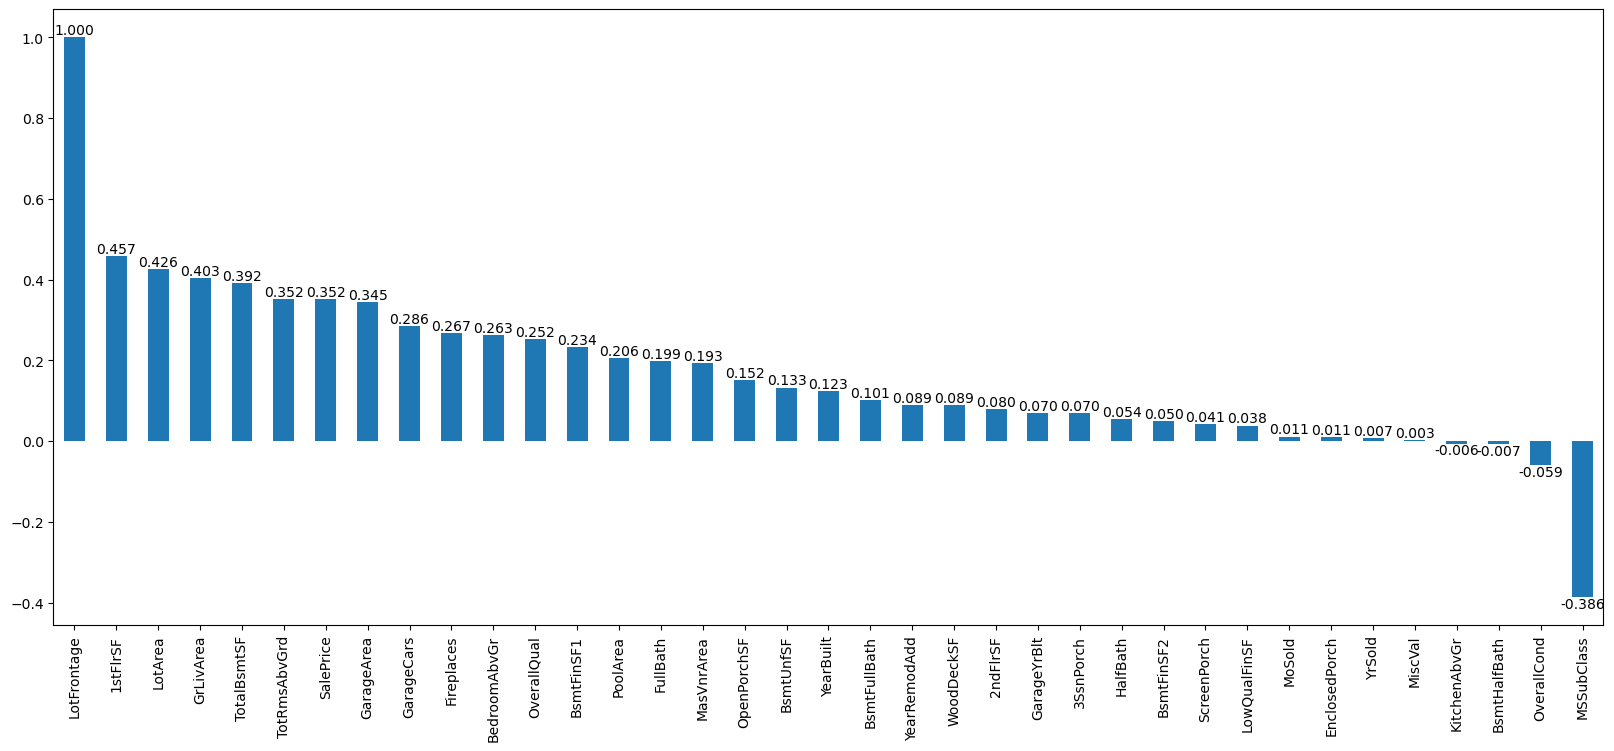

In [13]:
plt.figure(figsize=(20,8))
ax=train.corr()['LotFrontage'].sort_values(ascending=False).plot(kind='bar')
ax.bar_label(ax.containers[0], fmt='{:,.3f}')

In [14]:
#First, include LotFrontage with columns that have strong correlation
df_train=train[['LotFrontage','1stFlrSF','LotArea','GrLivArea','TotalBsmtSF','TotRmsAbvGrd','SalePrice','GarageArea']]

In [15]:
#make sure no null values for others
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   1stFlrSF      1460 non-null   int64  
 2   LotArea       1460 non-null   int64  
 3   GrLivArea     1460 non-null   int64  
 4   TotalBsmtSF   1460 non-null   int64  
 5   TotRmsAbvGrd  1460 non-null   int64  
 6   SalePrice     1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 91.4 KB


In [16]:
df_train.head(10)

,LotFrontage,1stFlrSF,LotArea,GrLivArea,TotalBsmtSF,TotRmsAbvGrd,SalePrice,GarageArea
0,65.0,856,8450,1710,856,8,208500,548
1,80.0,1262,9600,1262,1262,6,181500,460
2,68.0,920,11250,1786,920,6,223500,608
3,60.0,961,9550,1717,756,7,140000,642
4,84.0,1145,14260,2198,1145,9,250000,836
5,85.0,796,14115,1362,796,5,143000,480
6,75.0,1694,10084,1694,1686,7,307000,636
7,NaN,1107,10382,2090,1107,7,200000,484
8,51.0,1022,6120,1774,952,8,129900,468
9,50.0,1077,7420,1077,991,5,118000,205


In [17]:
#take only NaN values, this is for data prediction later
LotFrontage_null = df_train[df_train.LotFrontage.isnull()]
LotFrontage_null

,LotFrontage,1stFlrSF,LotArea,GrLivArea,TotalBsmtSF,TotRmsAbvGrd,SalePrice,GarageArea
7,NaN,1107,10382,2090,1107,7,200000,484
12,NaN,912,12968,912,912,4,144000,352
14,NaN,1253,10920,1253,1253,5,157000,352
16,NaN,1004,11241,1004,1004,5,149000,480
24,NaN,1060,8246,1060,1060,6,154000,270
...,...,...,...,...,...,...,...,...
1429,NaN,1440,12546,1440,1440,7,182900,467
1431,NaN,958,4928,958,958,5,143750,440
1441,NaN,848,4426,848,848,3,149300,420
1443,NaN,952,8854,952,952,4,121000,192


In [101]:
#dataframe without NaN
LotFrontage = df_train.copy()
LotFrontage = LotFrontage.dropna(axis=0)
LotFrontage

,LotFrontage,1stFlrSF,LotArea,GrLivArea,TotalBsmtSF,TotRmsAbvGrd,SalePrice,GarageArea
0,65.000000,856,8450,1710,856,8,208500,548
1,80.000000,1262,9600,1262,1262,6,181500,460
2,68.000000,920,11250,1786,920,6,223500,608
3,60.000000,961,9550,1717,756,7,140000,642
4,84.000000,1145,14260,2198,1145,9,250000,836
...,...,...,...,...,...,...,...,...
1429,76.812987,1440,12546,1440,1440,7,182900,467
1431,59.934023,958,4928,958,958,5,143750,440
1441,53.829576,848,4426,848,848,3,149300,420
1443,57.772835,952,8854,952,952,4,121000,192


In [19]:
X = LotFrontage.iloc[:,1:].values
y = LotFrontage.iloc[:,0].values

In [20]:
X

array([[   856,   8450,   1710, ...,      8, 208500,    548],
       [  1262,   9600,   1262, ...,      6, 181500,    460],
       [   920,  11250,   1786, ...,      6, 223500,    608],
       ...,
       [  1188,   9042,   2340, ...,      9, 266500,    252],
       [  1078,   9717,   1078, ...,      5, 142125,    240],
       [  1256,   9937,   1256, ...,      6, 147500,    276]], dtype=int64)

In [21]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# Predicting the test results
y_pred = model.predict(X_test)

In [23]:
data_sc = sc.transform(LotFrontage_null.iloc[:,1:].values)
LotFrontage_predict = model.predict(data_sc)

In [24]:
#replace Nan with predicted values via regression
LotFrontage_null['LotFrontage']=LotFrontage_predict

In [25]:
LotFrontage_null

,LotFrontage,1stFlrSF,LotArea,GrLivArea,TotalBsmtSF,TotRmsAbvGrd,SalePrice,GarageArea
7,71.149954,1107,10382,2090,1107,7,200000,484
12,62.447618,912,12968,912,912,4,144000,352
14,67.459650,1253,10920,1253,1253,5,157000,352
16,65.860590,1004,11241,1004,1004,5,149000,480
24,64.068643,1060,8246,1060,1060,6,154000,270
...,...,...,...,...,...,...,...,...
1429,76.812987,1440,12546,1440,1440,7,182900,467
1431,59.934023,958,4928,958,958,5,143750,440
1441,53.829576,848,4426,848,848,3,149300,420
1443,57.772835,952,8854,952,952,4,121000,192


In [26]:
# concatenate and make sure no more null values in LotFrontage
df_train=pd.concat([LotFrontage,LotFrontage_null])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1446
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1460 non-null   float64
 1   1stFlrSF      1460 non-null   int64  
 2   LotArea       1460 non-null   int64  
 3   GrLivArea     1460 non-null   int64  
 4   TotalBsmtSF   1460 non-null   int64  
 5   TotRmsAbvGrd  1460 non-null   int64  
 6   SalePrice     1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 102.7 KB


Try to do the same for GarageYrBlt

C:\Users\oggy0\AppData\Local\Temp\ipykernel_20472\3137951221.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=train.corr()['GarageYrBlt'].sort_values(ascending=False).plot(kind='bar')


[Text(0, 0, '1.000'),
 Text(0, 0, '0.826'),
 Text(0, 0, '0.642'),
 Text(0, 0, '0.589'),
 Text(0, 0, '0.565'),
 Text(0, 0, '0.548'),
 Text(0, 0, '0.486'),
 Text(0, 0, '0.485'),
 Text(0, 0, '0.322'),
 Text(0, 0, '0.253'),
 Text(0, 0, '0.233'),
 Text(0, 0, '0.231'),
 Text(0, 0, '0.228'),
 Text(0, 0, '0.225'),
 Text(0, 0, '0.197'),
 Text(0, 0, '0.191'),
 Text(0, 0, '0.153'),
 Text(0, 0, '0.148'),
 Text(0, 0, '0.125'),
 Text(0, 0, '0.085'),
 Text(0, 0, '0.071'),
 Text(0, 0, '0.070'),
 Text(0, 0, '0.047'),
 Text(0, 0, '0.024'),
 Text(0, 0, '0.005'),
 Text(0, 0, '-0.001'),
 Text(0, 0, '-0.015'),
 Text(0, 0, '-0.025'),
 Text(0, 0, '-0.032'),
 Text(0, 0, '-0.036'),
 Text(0, 0, '-0.065'),
 Text(0, 0, '-0.075'),
 Text(0, 0, '-0.077'),
 Text(0, 0, '-0.088'),
 Text(0, 0, '-0.124'),
 Text(0, 0, '-0.297'),
 Text(0, 0, '-0.324')]

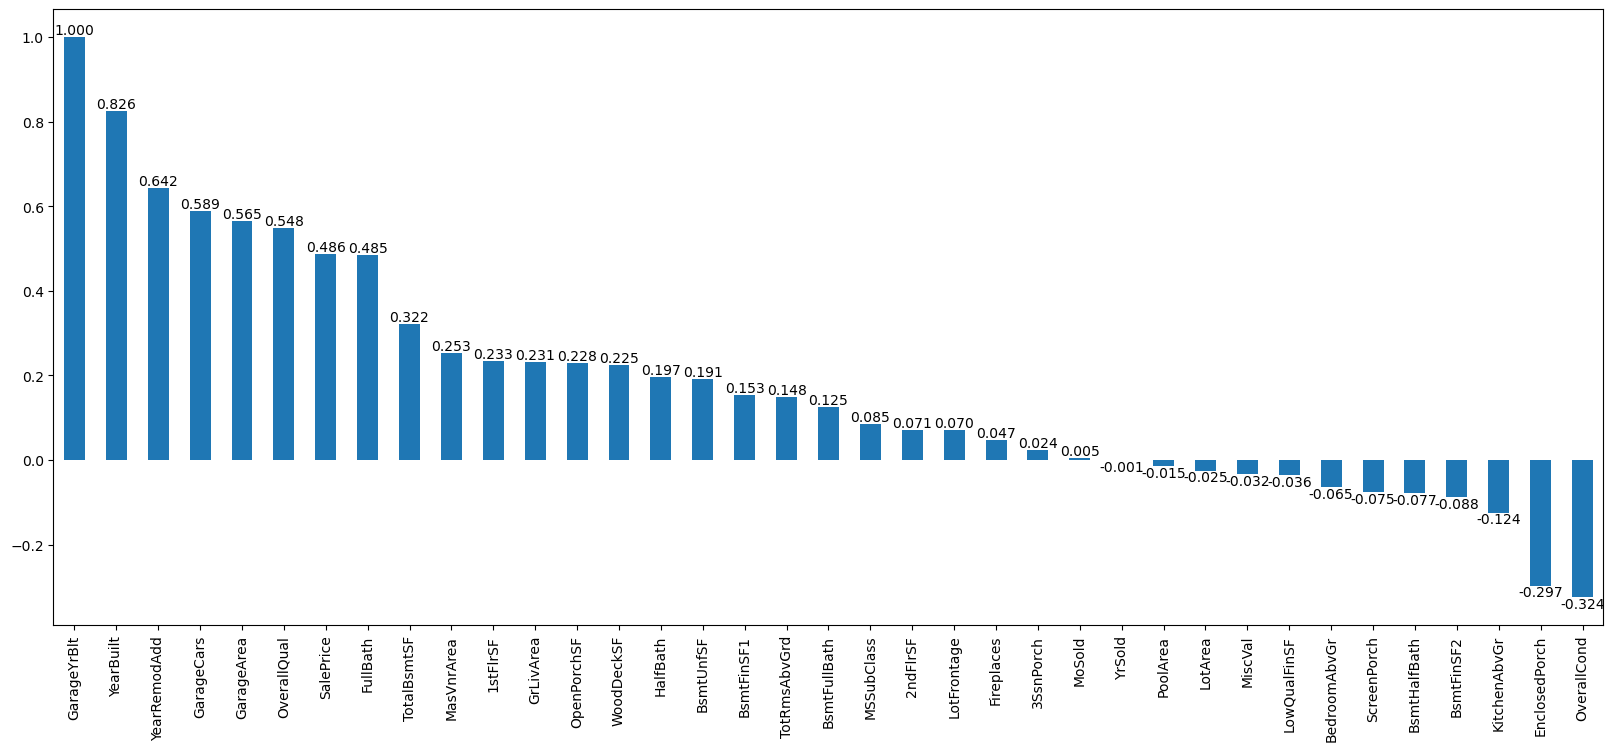

In [27]:
plt.figure(figsize=(20,8))
ax=train.corr()['GarageYrBlt'].sort_values(ascending=False).plot(kind='bar')
ax.bar_label(ax.containers[0], fmt='{:,.3f}')

In [28]:
df_train2= df[['GarageYrBlt','YearBuilt','YearRemodAdd','GarageCars','GarageArea','OverallQual','SalePrice','FullBath','TotalBsmtSF']]

In [29]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageYrBlt   1379 non-null   float64
 1   YearBuilt     1460 non-null   int64  
 2   YearRemodAdd  1460 non-null   int64  
 3   GarageCars    1460 non-null   int64  
 4   GarageArea    1460 non-null   int64  
 5   OverallQual   1460 non-null   int64  
 6   SalePrice     1460 non-null   int64  
 7   FullBath      1460 non-null   int64  
 8   TotalBsmtSF   1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.8 KB


In [30]:
#take only NaN values, this is for data prediction later
GarageYrBlt_null = df_train2[df_train2.GarageYrBlt.isnull()]
GarageYrBlt_null

,GarageYrBlt,YearBuilt,YearRemodAdd,GarageCars,GarageArea,OverallQual,SalePrice,FullBath,TotalBsmtSF
39,NaN,1955,1955,0,0,4,82000,2,0
48,NaN,1920,2008,0,0,4,113000,2,736
78,NaN,1968,1968,0,0,4,136500,2,1768
88,NaN,1915,1982,0,0,3,85000,1,1013
89,NaN,1994,1995,0,0,4,123600,1,990
...,...,...,...,...,...,...,...,...,...
1349,NaN,1872,1987,0,0,8,122000,2,684
1407,NaN,1985,1985,0,0,5,112000,1,833
1449,NaN,1970,1970,0,0,5,92000,1,630
1450,NaN,1974,1974,0,0,5,136000,2,896


In [31]:
#dataframe without NaN
GarageYrBlt = df_train2.copy()
GarageYrBlt = GarageYrBlt.dropna(axis=0)
GarageYrBlt

,GarageYrBlt,YearBuilt,YearRemodAdd,GarageCars,GarageArea,OverallQual,SalePrice,FullBath,TotalBsmtSF
0,2003.0,2003,2003,2,548,7,208500,2,856
1,1976.0,1976,1976,2,460,6,181500,2,1262
2,2001.0,2001,2002,2,608,7,223500,2,920
3,1998.0,1915,1970,3,642,7,140000,1,756
4,2000.0,2000,2000,3,836,8,250000,2,1145
...,...,...,...,...,...,...,...,...,...
1455,1999.0,1999,2000,2,460,6,175000,2,953
1456,1978.0,1978,1988,2,500,6,210000,2,1542
1457,1941.0,1941,2006,1,252,7,266500,2,1152
1458,1950.0,1950,1996,1,240,5,142125,1,1078


In [32]:
X = GarageYrBlt.iloc[:,1:].values
y = GarageYrBlt.iloc[:,0].values
y

array([2003., 1976., 2001., ..., 1941., 1950., 1965.])

In [33]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# Predicting the test results
y_pred = model.predict(X_test)

In [35]:
data_sc = sc.transform(GarageYrBlt_null.iloc[:,1:].values)
GarageYrBlt_predict = model.predict(data_sc)
#replace Nan with predicted values via regression
GarageYrBlt_null['GarageYrBlt']=np.around(GarageYrBlt_predict).astype('int64')
GarageYrBlt_null

,GarageYrBlt,YearBuilt,YearRemodAdd,GarageCars,GarageArea,OverallQual,SalePrice,FullBath,TotalBsmtSF
39,1951,1955,1955,0,0,4,82000,2,0
48,1937,1920,2008,0,0,4,113000,2,736
78,1952,1968,1968,0,0,4,136500,2,1768
88,1928,1915,1982,0,0,3,85000,1,1013
89,1973,1994,1995,0,0,4,123600,1,990
...,...,...,...,...,...,...,...,...,...
1349,1908,1872,1987,0,0,8,122000,2,684
1407,1968,1985,1985,0,0,5,112000,1,833
1449,1958,1970,1970,0,0,5,92000,1,630
1450,1960,1974,1974,0,0,5,136000,2,896


In [36]:
df_train2=pd.concat([GarageYrBlt,GarageYrBlt_null])
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1453
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageYrBlt   1460 non-null   float64
 1   YearBuilt     1460 non-null   int64  
 2   YearRemodAdd  1460 non-null   int64  
 3   GarageCars    1460 non-null   int64  
 4   GarageArea    1460 non-null   int64  
 5   OverallQual   1460 non-null   int64  
 6   SalePrice     1460 non-null   int64  
 7   FullBath      1460 non-null   int64  
 8   TotalBsmtSF   1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 114.1 KB


Repeat for MasVnrArea

C:\Users\oggy0\AppData\Local\Temp\ipykernel_20472\1474340922.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=train.corr()['MasVnrArea'].sort_values(ascending=False).plot(kind='bar')


[Text(0, 0, '1.000'),
 Text(0, 0, '0.477'),
 Text(0, 0, '0.412'),
 Text(0, 0, '0.391'),
 Text(0, 0, '0.373'),
 Text(0, 0, '0.364'),
 Text(0, 0, '0.364'),
 Text(0, 0, '0.345'),
 Text(0, 0, '0.316'),
 Text(0, 0, '0.281'),
 Text(0, 0, '0.277'),
 Text(0, 0, '0.265'),
 Text(0, 0, '0.253'),
 Text(0, 0, '0.249'),
 Text(0, 0, '0.201'),
 Text(0, 0, '0.193'),
 Text(0, 0, '0.180'),
 Text(0, 0, '0.175'),
 Text(0, 0, '0.160'),
 Text(0, 0, '0.126'),
 Text(0, 0, '0.114'),
 Text(0, 0, '0.104'),
 Text(0, 0, '0.103'),
 Text(0, 0, '0.085'),
 Text(0, 0, '0.061'),
 Text(0, 0, '0.027'),
 Text(0, 0, '0.023'),
 Text(0, 0, '0.019'),
 Text(0, 0, '0.012'),
 Text(0, 0, '-0.006'),
 Text(0, 0, '-0.008'),
 Text(0, 0, '-0.030'),
 Text(0, 0, '-0.038'),
 Text(0, 0, '-0.069'),
 Text(0, 0, '-0.072'),
 Text(0, 0, '-0.110'),
 Text(0, 0, '-0.128')]

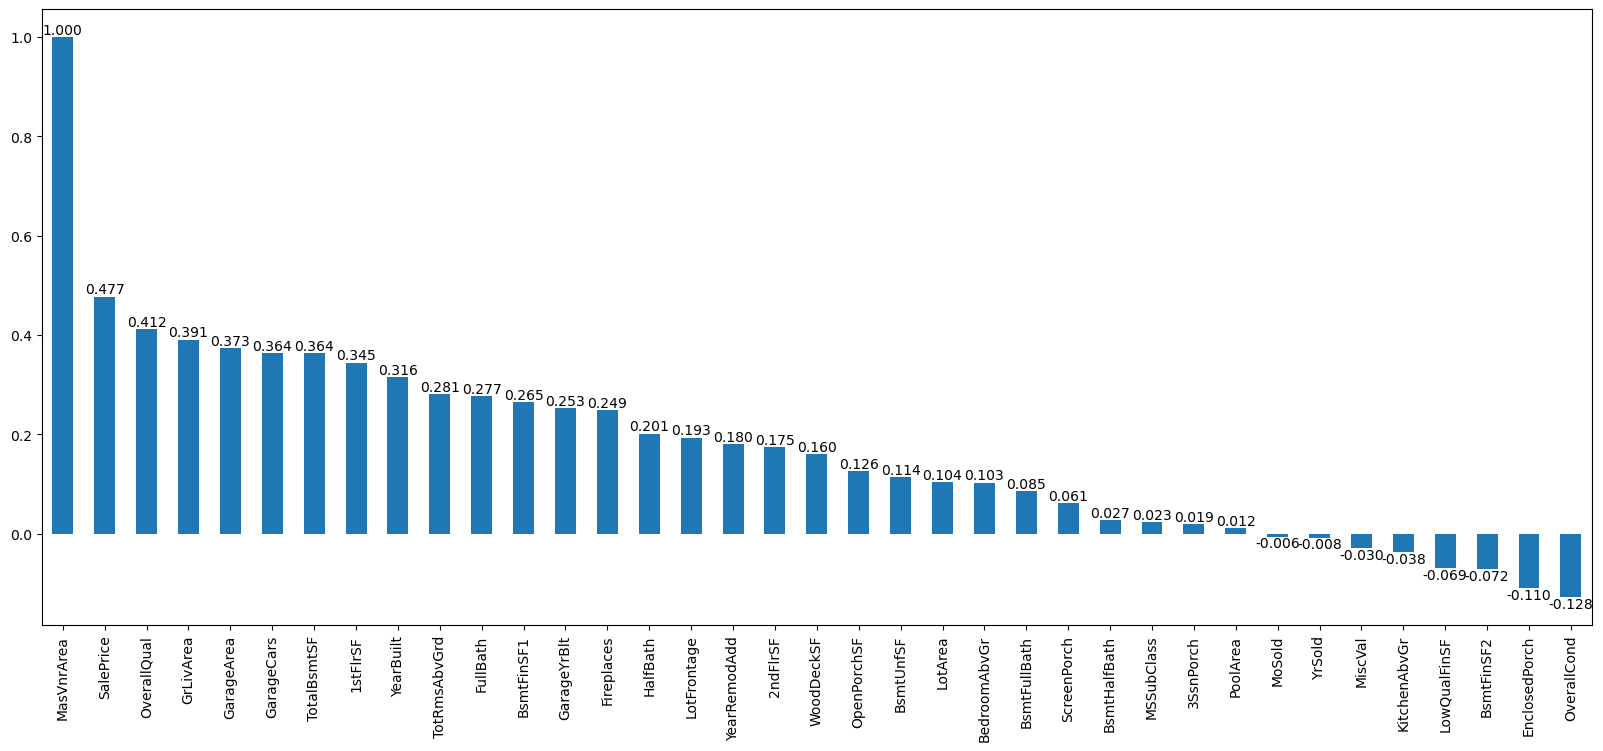

In [37]:
plt.figure(figsize=(20,8))
ax=train.corr()['MasVnrArea'].sort_values(ascending=False).plot(kind='bar')
ax.bar_label(ax.containers[0], fmt='{:,.3f}')

In [38]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [39]:
df_train3=train[['MasVnrArea','SalePrice','OverallQual','GrLivArea','GarageArea','GarageCars','TotalBsmtSF','1stFlrSF','YearBuilt']]
df_train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MasVnrArea   1452 non-null   float64
 1   SalePrice    1460 non-null   int64  
 2   OverallQual  1460 non-null   int64  
 3   GrLivArea    1460 non-null   int64  
 4   GarageArea   1460 non-null   int64  
 5   GarageCars   1460 non-null   int64  
 6   TotalBsmtSF  1460 non-null   int64  
 7   1stFlrSF     1460 non-null   int64  
 8   YearBuilt    1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.8 KB


In [40]:
#take only NaN values, this is for data prediction later
MasVnrArea_null = df_train3[df_train3.MasVnrArea.isnull()]
MasVnrArea_null

,MasVnrArea,SalePrice,OverallQual,GrLivArea,GarageArea,GarageCars,TotalBsmtSF,1stFlrSF,YearBuilt
234,NaN,216500,6,1960,440,2,860,860,2002
529,NaN,200624,6,2515,484,2,2035,2515,1957
650,NaN,205950,7,1665,562,2,813,822,2007
936,NaN,184900,7,1200,555,2,1176,1200,2003
973,NaN,182000,7,1428,480,2,1428,1428,2007
977,NaN,199900,7,1241,569,2,1241,1241,2006
1243,NaN,465000,10,2076,850,3,2076,2076,2006
1278,NaN,237000,8,2031,577,2,1128,1128,2002


In [41]:
#dataframe without NaN
MasVnrArea = df_train3.copy()
MasVnrArea = MasVnrArea.dropna(axis=0)
MasVnrArea

,MasVnrArea,SalePrice,OverallQual,GrLivArea,GarageArea,GarageCars,TotalBsmtSF,1stFlrSF,YearBuilt
0,196.0,208500,7,1710,548,2,856,856,2003
1,0.0,181500,6,1262,460,2,1262,1262,1976
2,162.0,223500,7,1786,608,2,920,920,2001
3,0.0,140000,7,1717,642,3,756,961,1915
4,350.0,250000,8,2198,836,3,1145,1145,2000
...,...,...,...,...,...,...,...,...,...
1455,0.0,175000,6,1647,460,2,953,953,1999
1456,119.0,210000,6,2073,500,2,1542,2073,1978
1457,0.0,266500,7,2340,252,1,1152,1188,1941
1458,0.0,142125,5,1078,240,1,1078,1078,1950


In [42]:
X = MasVnrArea.iloc[:,1:].values
y = MasVnrArea.iloc[:,0].values
X

array([[208500,      7,   1710, ...,    856,    856,   2003],
       [181500,      6,   1262, ...,   1262,   1262,   1976],
       [223500,      7,   1786, ...,    920,    920,   2001],
       ...,
       [266500,      7,   2340, ...,   1152,   1188,   1941],
       [142125,      5,   1078, ...,   1078,   1078,   1950],
       [147500,      5,   1256, ...,   1256,   1256,   1965]], dtype=int64)

In [43]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# Predicting the test results
y_pred = model.predict(X_test)

In [45]:
#use trained modelto predict NaN values
data_sc = sc.transform(MasVnrArea_null.iloc[:,1:].values)
MasVnrArea_predict = model.predict(data_sc)
#replace Nan with predicted values via regression
MasVnrArea_null['MasVnrArea']=MasVnrArea_predict
MasVnrArea_null

,MasVnrArea,SalePrice,OverallQual,GrLivArea,GarageArea,GarageCars,TotalBsmtSF,1stFlrSF,YearBuilt
234,130.583554,216500,6,1960,440,2,860,860,2002
529,166.853174,200624,6,2515,484,2,2035,2515,1957
650,138.809336,205950,7,1665,562,2,813,822,2007
936,121.279879,184900,7,1200,555,2,1176,1200,2003
973,125.789360,182000,7,1428,480,2,1428,1428,2007
977,136.841125,199900,7,1241,569,2,1241,1241,2006
1243,374.350721,465000,10,2076,850,3,2076,2076,2006
1278,182.999156,237000,8,2031,577,2,1128,1128,2002


In [46]:
df_train3=pd.concat([MasVnrArea,MasVnrArea_null])
df_train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1278
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MasVnrArea   1460 non-null   float64
 1   SalePrice    1460 non-null   int64  
 2   OverallQual  1460 non-null   int64  
 3   GrLivArea    1460 non-null   int64  
 4   GarageArea   1460 non-null   int64  
 5   GarageCars   1460 non-null   int64  
 6   TotalBsmtSF  1460 non-null   int64  
 7   1stFlrSF     1460 non-null   int64  
 8   YearBuilt    1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 114.1 KB


Back to the main dataframe we want to use, df. Replace GarageYrBlt,MasVnrArea and LotFrontage with ones we got from regression

In [47]:
df['LotFrontage']=df_train['LotFrontage'].copy()
df['GarageYrBlt']=df_train2['GarageYrBlt'].copy()
df['MasVnrArea']=df_train3['MasVnrArea'].copy()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   OverallQual   1460 non-null   int64  
 2   GrLivArea     1460 non-null   int64  
 3   GarageCars    1460 non-null   int64  
 4   GarageArea    1460 non-null   int64  
 5   TotalBsmtSF   1460 non-null   int64  
 6   1stFlrSF      1460 non-null   int64  
 7   FullBath      1460 non-null   int64  
 8   TotRmsAbvGrd  1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  YearRemodAdd  1460 non-null   int64  
 11  GarageYrBlt   1460 non-null   float64
 12  MasVnrArea    1460 non-null   float64
 13  Fireplaces    1460 non-null   int64  
 14  BsmtFinSF1    1460 non-null   int64  
 15  LotFrontage   1460 non-null   float64
 16  WoodDeckSF    1460 non-null   int64  
 17  2ndFlrSF      1460 non-null   int64  
 18  OpenPorchSF   1460 non-null 

Handle null values of df_predict

There are some columns such as GarageCars,GarageArea,TotalBsmtSF,BsmtFinSF1 that's missing one row of values. GarageCars is related to GarageArea, TotalBsmtSF is related to BsmtFinSF1 as they have missing value in the same row. Instead of dropping them and lose the row (we'll try to keep all the rows), let's fill them using interpolation.  

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [50]:
df_predict = test[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF']]

In [51]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   GarageCars    1458 non-null   float64
 3   GarageArea    1458 non-null   float64
 4   TotalBsmtSF   1458 non-null   float64
 5   1stFlrSF      1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotRmsAbvGrd  1459 non-null   int64  
 8   YearBuilt     1459 non-null   int64  
 9   YearRemodAdd  1459 non-null   int64  
 10  GarageYrBlt   1381 non-null   float64
 11  MasVnrArea    1444 non-null   float64
 12  Fireplaces    1459 non-null   int64  
 13  BsmtFinSF1    1458 non-null   float64
 14  LotFrontage   1232 non-null   float64
 15  WoodDeckSF    1459 non-null   int64  
 16  2ndFlrSF      1459 non-null   int64  
 17  OpenPorchSF   1459 non-null   int64  
dtypes: float64(7), int64(11)
mem

In [52]:
df_predict.isna().sum()

OverallQual       0
GrLivArea         0
GarageCars        1
GarageArea        1
TotalBsmtSF       1
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
GarageYrBlt      78
MasVnrArea       15
Fireplaces        0
BsmtFinSF1        1
LotFrontage     227
WoodDeckSF        0
2ndFlrSF          0
OpenPorchSF       0
dtype: int64

In [53]:
df_predict.TotalBsmtSF.loc[df_predict.TotalBsmtSF.isna()]

660   NaN
Name: TotalBsmtSF, dtype: float64

In [54]:
df_predict.BsmtFinSF1.loc[df_predict.BsmtFinSF1.isna()]

660   NaN
Name: BsmtFinSF1, dtype: float64

In [55]:
df_predict.GarageArea.loc[df_predict.GarageArea.isna()]

1116   NaN
Name: GarageArea, dtype: float64

In [56]:
df_predict.GarageCars.loc[df_predict.GarageCars.isna()]

1116   NaN
Name: GarageCars, dtype: float64

In [57]:
df_predict.TotalBsmtSF=df_predict.TotalBsmtSF.interpolate()
df_predict.BsmtFinSF1=df_predict.BsmtFinSF1.interpolate()
df_predict.GarageArea=df_predict.GarageArea.interpolate()
df_predict.GarageCars=df_predict.GarageCars.interpolate()

In [58]:
df_predict.isna().sum()

OverallQual       0
GrLivArea         0
GarageCars        0
GarageArea        0
TotalBsmtSF       0
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
GarageYrBlt      78
MasVnrArea       15
Fireplaces        0
BsmtFinSF1        0
LotFrontage     227
WoodDeckSF        0
2ndFlrSF          0
OpenPorchSF       0
dtype: int64

Handle null values of df_predict, starts with LotFrontage

In [59]:
#First, include LotFrontage with columns that have strong correlation
df_test=df_predict[['LotFrontage','1stFlrSF','GrLivArea','TotalBsmtSF','TotRmsAbvGrd','GarageArea']].copy()
df_test['LotArea']=test['LotArea'].copy()

In [60]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1232 non-null   float64
 1   1stFlrSF      1459 non-null   int64  
 2   GrLivArea     1459 non-null   int64  
 3   TotalBsmtSF   1459 non-null   float64
 4   TotRmsAbvGrd  1459 non-null   int64  
 5   GarageArea    1459 non-null   float64
 6   LotArea       1459 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 79.9 KB


In [61]:
#take only NaN values, this is for data prediction later
LotFrontage_null = df_test[df_test.LotFrontage.isnull()]
LotFrontage_null
#dataframe without NaN
LotFrontage = df_test.copy()
LotFrontage = LotFrontage.dropna(axis=0)
LotFrontage

X = LotFrontage.iloc[:,1:].values
y = LotFrontage.iloc[:,0].values

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# Predicting the test results
y_pred = model.predict(X_test)

data_sc = sc.transform(LotFrontage_null.iloc[:,1:].values)
LotFrontage_predict = model.predict(data_sc)

#replace Nan with predicted values via regression
LotFrontage_null['LotFrontage']=LotFrontage_predict

In [62]:
# concatenate and make sure no more null values in LotFrontage
df_test=pd.concat([LotFrontage,LotFrontage_null])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1448
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1459 non-null   float64
 1   1stFlrSF      1459 non-null   int64  
 2   GrLivArea     1459 non-null   int64  
 3   TotalBsmtSF   1459 non-null   float64
 4   TotRmsAbvGrd  1459 non-null   int64  
 5   GarageArea    1459 non-null   float64
 6   LotArea       1459 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 91.2 KB


In [63]:
LotFrontage_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 6 to 1448
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   227 non-null    float64
 1   1stFlrSF      227 non-null    int64  
 2   GrLivArea     227 non-null    int64  
 3   TotalBsmtSF   227 non-null    float64
 4   TotRmsAbvGrd  227 non-null    int64  
 5   GarageArea    227 non-null    float64
 6   LotArea       227 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 14.2 KB


Repeat process for test's GarageYrBlt

In [64]:
df_test2= df_predict[['GarageYrBlt','YearBuilt','YearRemodAdd','GarageCars','GarageArea','OverallQual','FullBath','TotalBsmtSF']].copy()

In [65]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageYrBlt   1381 non-null   float64
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   GarageCars    1459 non-null   float64
 4   GarageArea    1459 non-null   float64
 5   OverallQual   1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotalBsmtSF   1459 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 91.3 KB


In [68]:
#take only NaN values, this is for data prediction later
GarageYrBlt_null = df_test2[df_test2.GarageYrBlt.isnull()]
GarageYrBlt_null
#dataframe without NaN
GarageYrBlt = df_test2.copy()
GarageYrBlt = GarageYrBlt.dropna(axis=0)

X = GarageYrBlt.iloc[:,1:].values
y = GarageYrBlt.iloc[:,0].values

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# Predicting the test results
y_pred = model.predict(X_test)

data_sc = sc.transform(GarageYrBlt_null.iloc[:,1:].values)
GarageYrBlt_predict = model.predict(data_sc)

#replace Nan with predicted values via regression
GarageYrBlt_null['GarageYrBlt']=np.around(GarageYrBlt_predict).astype('int64')
df_test2=pd.concat([GarageYrBlt,GarageYrBlt_null])
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1457
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageYrBlt   1459 non-null   float64
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   GarageCars    1459 non-null   float64
 4   GarageArea    1459 non-null   float64
 5   OverallQual   1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotalBsmtSF   1459 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 102.6 KB


Repeat for MasVnrArea 

In [69]:
df_test3=df_predict[['MasVnrArea','OverallQual','GrLivArea','GarageArea','GarageCars','TotalBsmtSF','1stFlrSF','YearBuilt']]
df_test3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MasVnrArea   1444 non-null   float64
 1   OverallQual  1459 non-null   int64  
 2   GrLivArea    1459 non-null   int64  
 3   GarageArea   1459 non-null   float64
 4   GarageCars   1459 non-null   float64
 5   TotalBsmtSF  1459 non-null   float64
 6   1stFlrSF     1459 non-null   int64  
 7   YearBuilt    1459 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 91.3 KB


In [70]:
#take only NaN values, this is for data prediction later
MasVnrArea_null = df_test3[df_test3.MasVnrArea.isnull()]
MasVnrArea_null
#dataframe without NaN
MasVnrArea = df_test3.copy()
MasVnrArea = MasVnrArea.dropna(axis=0)

X = MasVnrArea.iloc[:,1:].values
y = MasVnrArea.iloc[:,0].values

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# Predicting the test results
y_pred = model.predict(X_test)

data_sc = sc.transform(MasVnrArea_null.iloc[:,1:].values)
MasVnrArea_predict = model.predict(data_sc)

#replace Nan with predicted values via regression
MasVnrArea_null['MasVnrArea']=MasVnrArea_predict
df_test3=pd.concat([MasVnrArea,MasVnrArea_null])
df_test3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1402
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MasVnrArea   1459 non-null   float64
 1   OverallQual  1459 non-null   int64  
 2   GrLivArea    1459 non-null   int64  
 3   GarageArea   1459 non-null   float64
 4   GarageCars   1459 non-null   float64
 5   TotalBsmtSF  1459 non-null   float64
 6   1stFlrSF     1459 non-null   int64  
 7   YearBuilt    1459 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 102.6 KB


In [71]:
df_predict['LotFrontage']=df_test['LotFrontage'].copy()
df_predict['GarageYrBlt']=df_test2['GarageYrBlt'].copy()
df_predict['MasVnrArea']=df_test3['MasVnrArea'].copy()

Now,let's start to do regression training to predict SalePrice

In [72]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [73]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# Predicting the test results
y_pred = model.predict(X_test)

Now, predict SalePrice of the test, using the same columns as df

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   OverallQual   1460 non-null   int64  
 2   GrLivArea     1460 non-null   int64  
 3   GarageCars    1460 non-null   int64  
 4   GarageArea    1460 non-null   int64  
 5   TotalBsmtSF   1460 non-null   int64  
 6   1stFlrSF      1460 non-null   int64  
 7   FullBath      1460 non-null   int64  
 8   TotRmsAbvGrd  1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  YearRemodAdd  1460 non-null   int64  
 11  GarageYrBlt   1460 non-null   float64
 12  MasVnrArea    1460 non-null   float64
 13  Fireplaces    1460 non-null   int64  
 14  BsmtFinSF1    1460 non-null   int64  
 15  LotFrontage   1460 non-null   float64
 16  WoodDeckSF    1460 non-null   int64  
 17  2ndFlrSF      1460 non-null   int64  
 18  OpenPorchSF   1460 non-null 

In [75]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   GarageCars    1459 non-null   float64
 3   GarageArea    1459 non-null   float64
 4   TotalBsmtSF   1459 non-null   float64
 5   1stFlrSF      1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotRmsAbvGrd  1459 non-null   int64  
 8   YearBuilt     1459 non-null   int64  
 9   YearRemodAdd  1459 non-null   int64  
 10  GarageYrBlt   1459 non-null   float64
 11  MasVnrArea    1459 non-null   float64
 12  Fireplaces    1459 non-null   int64  
 13  BsmtFinSF1    1459 non-null   float64
 14  LotFrontage   1459 non-null   float64
 15  WoodDeckSF    1459 non-null   int64  
 16  2ndFlrSF      1459 non-null   int64  
 17  OpenPorchSF   1459 non-null   int64  
dtypes: float64(7), int64(11)
mem

In [76]:
#use trained modelto predict test values
data_sc = sc.transform(df_predict.iloc[:,:].values)
SalePrice_predict = model.predict(data_sc)

In [80]:
SalePrice_predict = pd.Series(SalePrice_predict) 

In [81]:
new_df = pd.concat([test_ID,SalePrice_predict])

In [86]:
SalePrice_predict.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1459 entries, 0 to 1458
Series name: None
Non-Null Count  Dtype  
--------------  -----  
1459 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [83]:
new_df.head()

0    1461.0
1    1462.0
2    1463.0
3    1464.0
4    1465.0
dtype: float64

In [87]:
new_df.to_csv('submission.csv', index=False)

In [88]:
new_pred = pd.read_csv('submission.csv')

In [90]:
new_pred.head()

,Id,SalePrice
0,1461,109534.538764
1,1462,165833.052464
2,1463,179025.670418
3,1464,202148.432150
4,1465,204267.663205


In [ ]:
import sklearn